**Tensorflow Basics**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)

2023-07-08 13:34:53.533890: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-08 13:34:53.562736: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:34:54.079839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.1


***Ex1:*** Build a neural network model with 1 layer with just 1 neuron

In [2]:
# create a simple Sequential model with just one dense layer
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# compile the model with stochastic gradient descent optimizer and mean squared loss function
model.compile(optimizer='sgd',loss='mean_squared_error')

In [3]:
# synthesize some training data 
xs = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
ys = np.array([-4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0])

# train the model for 100 epochs of sgd
model.fit(xs, ys, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 25.6627
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 18.2826
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0321
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.2965
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.6385
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 4.7471
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 3.4010
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 2.4428
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.7606
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 1.2746
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 0.9284
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6815
Epoch 13/100
1/1 [==============================] - 0s 1

In [4]:
# make a prediction
model.predict([10.0])

1/1 [==============================] - 0s 117ms/step


array([[19.87981]], dtype=float32)

***Ex2:*** Now, build a model with two dense layers for a multi-class classification task. The first layer is the hidden layer with 128 nuerons and the second layer is the output layer with number of neurons equal to the number of possible output classes. Each of these neurons outputs the probability for one of the corresponding classes.  

In [2]:
'''
 Load fasion MNIST dataset. The input features are 28x28 pixel grayscale images of clothing items and the outout labels consist of 10 possible classes (ten different clothing items) 
Class Label Description:
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot) 
'''
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [3]:
# check the shapes of the data arrays (there are 600000 training images and 10000 test images)
print(f"training images shape = {training_images.shape}")
print(f"training labels shape = {training_labels.shape}")
print(f"test images shape = {test_images.shape}")
print(f"test labels shape = {test_labels.shape}")

# normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

training images shape = (60000, 28, 28)
training labels shape = (60000,)
test images shape = (10000, 28, 28)
test labels shape = (10000,)


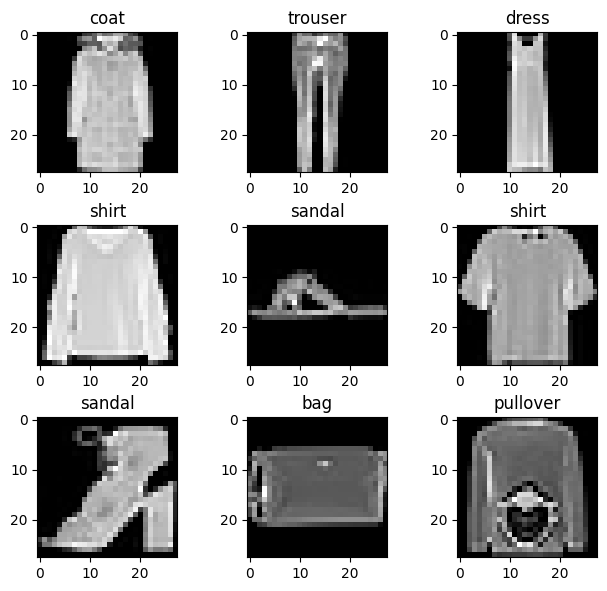

In [4]:
import matplotlib.pyplot as plt

label = {0:"top", 1:"trouser", 2:"pullover", 3:"dress", 4:"coat", 5:"sandal", 6:"shirt", 7:"sneaker", 8:"bag", 9:"boot"}

# visualize some of the training images
n=3
idx = np.random.choice(np.arange(6000), size=(n,n), replace=False)
plt.figure(figsize=(7,7))

for i in range(n):
    for j in range(n):
        plt.subplot(n,n, 1+i * n + j)
        plt.imshow(training_images[idx[i,j]], cmap='gray')
        plt.title(label[training_labels[idx[i,j]]])

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.1)        

In [39]:
##### Quick test of the relu and softmax activation functions

# create some sample data
xs = np.array([1.0, 5.0, 3.0, -2.0])
inputs = tf.convert_to_tensor(xs)
print(f"Inputs: {inputs}")

# compute relu output
relu_output = tf.nn.relu(inputs)
print(f"output of relu function: {relu_output.numpy()}")

# compute softmax output
softmax_output = tf.nn.softmax(inputs)
print(f"output of softmax function: {softmax_output.numpy()}, sum = {tf.reduce_sum(softmax_output)}")


Inputs: [ 1.  5.  3. -2.]
output of relu function: [1. 5. 3. 0.]
output of softmax function: [1.58637008e-02 8.66128717e-01 1.17217775e-01 7.89807157e-04], sum = 0.9999999999999999


In [40]:
# create the model
model = keras.models.Sequential([keras.layers.Flatten(), # flatten layer for reshaping (28,28) image into (28*28,1)
                                 keras.layers.Dense(units=128, activation=tf.nn.relu), # hidden layer with 128 neuron and relu activation
                                 keras.layers.Dense(units=10, activation=tf.nn.softmax)]) # output layer with 10 neurons and softmax activation



In [44]:
# compile and train the model (also output the accuracy metric)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4785 - accuracy: 0.8324
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4631 - accuracy: 0.8382
Epoch 3/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4506 - accuracy: 0.8422
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4410 - accuracy: 0.8455
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4324 - accuracy: 0.8486
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4255 - accuracy: 0.8503
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4190 - accuracy: 0.8527
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4135 - accuracy: 0.8547


In [45]:
# evaluate the model using the unseen test data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4485 - accuracy: 0.8386


[0.4484837055206299, 0.8385999798774719]

In [46]:
# compute predictions on test images
test_preds = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [50]:
# Note that the predicted probabilities are highest for the corresponding actual labels, indication that hthe model is able to generalise to unseen data 
for i in range(5):
    print(f"Test Image#{i}")
    print(f"Predicted probabilities: {test_preds[i]}")
    print(f"Actual Label: {test_labels[i]}\n")

Test Image#0
Predicted probabilities: [2.7123244e-07 2.6472518e-08 5.1398547e-06 2.1003789e-06 9.6306312e-06
 1.2234056e-01 7.5274725e-06 2.9357105e-01 2.8832152e-03 5.8118045e-01]
Actual Label: 9

Test Image#1
Predicted probabilities: [3.2569407e-04 9.4436864e-06 9.2168730e-01 1.7305880e-04 1.4649331e-02
 6.3445926e-10 6.2965654e-02 4.0184713e-14 1.8954424e-04 3.2131832e-12]
Actual Label: 2

Test Image#2
Predicted probabilities: [8.55437793e-06 9.99726236e-01 8.39710083e-06 1.49754560e-04
 1.06929874e-04 2.33447376e-12 8.65920882e-08 2.49030112e-08
 1.67020726e-08 2.11951116e-11]
Actual Label: 1

Test Image#3
Predicted probabilities: [1.0997364e-06 9.9952507e-01 6.4548117e-06 4.1527930e-04 5.2119027e-05
 9.5335941e-11 3.8148421e-08 2.5229189e-08 5.2825997e-09 6.1343980e-10]
Actual Label: 1

Test Image#4
Predicted probabilities: [1.3542427e-01 8.8498573e-04 8.3543546e-02 2.4720443e-02 2.1021865e-02
 5.6829699e-06 7.2836292e-01 3.1220271e-08 6.0357638e-03 4.6157714e-07]
Actual Label: 6


Now, let's see what happens when we add an extra hidden layer and increase the number of neurons.

In [5]:
# create the model
model = keras.models.Sequential([keras.layers.Flatten(),                                  # flatten layer for reshaping (28,28) image into (28*28,1)
                                 keras.layers.Dense(units=256, activation=tf.nn.relu),    # first hidden layer with 256 neuron and relu activation
                                 keras.layers.Dense(units=128, activation=tf.nn.relu),    # second hidden layer with 128 neuron and relu activation
                                 keras.layers.Dense(units=10, activation=tf.nn.softmax)]) # output layer with 10 neurons and softmax activation

# compile and train the model (also output the accuracy metric)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=30)

# evaluate the model using the unseen test data
loss, metrics = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {metrics}")

2023-07-08 13:35:18.059633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 13:35:18.073399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 13:35:18.073435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 13:35:18.076193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 13:35:18.076225: I tensorflow/compile

Epoch 1/30


2023-07-08 13:35:20.109070: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-08 13:35:20.491329: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7faed90593f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-08 13:35:20.491359: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2023-07-08 13:35:20.494310: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-08 13:35:20.608781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-08 13:35:20.679120: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

1875/1875 [==============================] - 6s 2ms/step - loss: 0.4804 - accuracy: 0.8285 - val_loss: 0.4297 - val_accuracy: 0.8365
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3611 - accuracy: 0.8662 - val_loss: 0.4181 - val_accuracy: 0.8419
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3237 - accuracy: 0.8797 - val_loss: 0.3546 - val_accuracy: 0.8682
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3008 - accuracy: 0.8868 - val_loss: 0.3795 - val_accuracy: 0.8600
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.8931 - val_loss: 0.3347 - val_accuracy: 0.8789
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.8992 - val_loss: 0.3378 - val_accuracy: 0.8803
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2537 - accuracy: 0.9035 - val_loss: 0.3420 - val_accuracy: 0.8840
Epo

Let's now implement early stopping of training using callbacks

In [60]:
# create a custom callback class that inbherits from keras Callback
    
'''
    Call back class that implements early stopping
'''
class myCallback(keras.callbacks.Callback):
    '''
        halts training after reaching 0.8 accuracy
    '''
    def on_epoch_end(self, epoch, logs = {}):

        # check the accuracy
        if(logs['val_accuracy'] >= 0.8):
            # stop training if validation accuracy exceeds threshold
            print(" Validation accuracy above 0.8. Training stopped")
            self.model.stop_training = True


# instantiate a callback obkect
callback = myCallback()


# create the model
model = keras.models.Sequential([keras.layers.Flatten(),                                  # flatten layer for reshaping (28,28) image into (28*28,1)
                                 keras.layers.Dense(units=512, activation=tf.nn.relu),    # second hidden layer with 128 neuron and relu activation
                                 keras.layers.Dense(units=10, activation=tf.nn.softmax)]) # output layer with 10 neurons and softmax activation

# compile and train the model with the callback
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=20, callbacks=[callback])

# evaluate the model using the unseen test data
loss, metrics = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {metrics}")


Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8890 - accuracy: 0.7010 - val_loss: 0.6202 - val_accuracy: 0.7736
Epoch 2/20
313/313 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.8034
Test accuracy: 0.8033999800682068
